In [1]:
import pandas as pd
import numpy as np

from Tools.Tokenizer.tokenizer import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [2]:
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_colwidth', 300)
pd.options.mode.chained_assignment = None 

In [3]:
stop_words = set(stopwords.words('armenian')) 

# Helpers
def tokenize(text):
    T = Tokenizer(text)
    T.segmentation().tokenization()
    word_tokens = []
    for segment in T.segments:
        for token in segment['tokens']:
            word_tokens.append(token[1].lower())
    return word_tokens

def remove_stopwords(word_tokens):
    filtered_word_tokens = [w for w in word_tokens if not w in stop_words]
    return filtered_word_tokens

def stemming(word_tokens):
    stemmer = SnowballStemmer("armenian") 
    filtered_word_tokens = [ stemmer.stem(w) for w in word_tokens ]
    return filtered_word_tokens

# def stemmingq(sentence):
#     stemmer = SnowballStemmer("armenian") 
#     stemSentence = ""
#     for word in sentence:
#         stem = stemmer.stem(word)
#         stemSentence += stem
#         stemSentence += " "
#         stemSentence = stemSentence.strip()
#         return stemSentence


# # թեստինգ տեքստ
# text = 'Թոքաբորբի ամենահաճախ հանդիպող ախտանիշներն են՝ հազ, որը կարող է լինել չոր կամ թաց (խորխով) ջերմության բարձրացում (սովորաբար 38.5°C-ից բարձր), որն ուղեկցվում է դողով և առատ քրտնարտադրությամբ, շնչառության հետ կապված խնդիրներ, օրինակ՝ հևոց (հատկապես մանուկների մոտ), ընդհանուր թուլություն և հոգնածության զգացում, ախորժակի անկում։'

# # cleaning up text
# word_tokens = tokenize(text)
# word_tokens = remove_stopwords(word_tokens)
# word_tokens = stemming(word_tokens)

# print(word_tokens)




In [4]:
# Load Training data
df = pd.read_csv('data/clean/Trainning_reviews.csv')

# cleaning up text
df['Description'] = df['Description'].apply(lambda row : row + '։') 
df['Description'] = df['Description'].apply(tokenize)

df['Description'] = df['Description'].apply(remove_stopwords)
df['Description'] = df['Description'].apply(stemming)
df['Description'] = df['Description'].apply(lambda row : ' '.join(row)) 

# df['Description'] = df['Description'].apply(stemmingq)
df.rename(columns = {'Symptoms':'symptom_list'}, inplace = True) 

In [5]:
# an empty list
symptoms = [] 
# extract genres
for i in df['symptom_list']: 
    symptoms.append(i.split(', ')) 
# add to 'movies' dataframe  
df['Symptoms'] = symptoms

In [6]:
df

,Description,symptom_list,Symptoms
0,քոր,itching,[itching]
1,մաշկ ցան,skin_rash,[skin_rash]
2,դուրս թա պզ բշտիկ,nodal_skin_eruptions,[nodal_skin_eruptions]
3,շարունակ փռշտ փռշտ,continuous_sneezing,[continuous_sneezing]
4,ցնցում դող դողէրոցք,shivering,[shivering]
5,սարսուռ դող,chills,[chills]
6,հոդ ցավ հոդ ծնկ ցավ ծունկ արմունկ ցավ արմունկ,joint_pain,[joint_pain]
7,ստամոքս ցավ,stomach_pain,[stomach_pain]
8,թթվայն թթվ թթվայն բարձր ստամոքս այր,acidity,[acidity]
9,բշտիկ լեզ,ulcers_on_tongue,[ulcers_on_tongue]


In [7]:
# get all genre tags in a list
all_symptoms = sum(symptoms,[])
len(set(all_symptoms))

137

In [8]:
all_symptoms = nltk.FreqDist(all_symptoms) 
# create dataframe
all_symptoms_df = pd.DataFrame({'Symtom': list(all_symptoms.keys()), 
'Count': list(all_symptoms.values())})

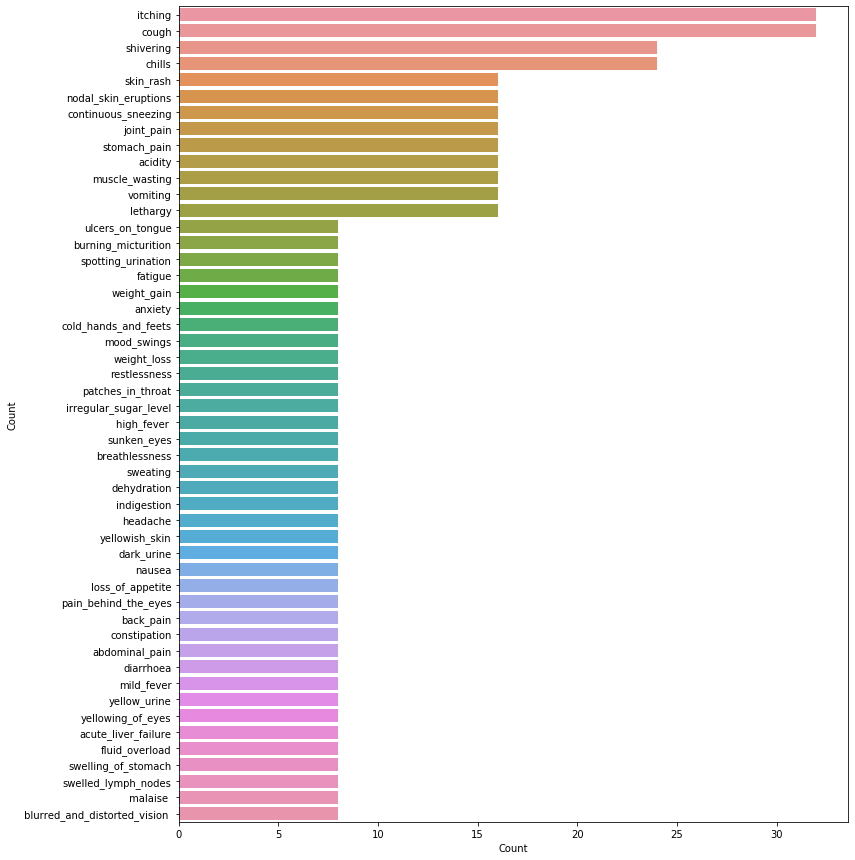

In [9]:
g = all_symptoms_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Symtom") 
ax.set(ylabel = 'Count') 
plt.show()

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['Symptoms'])
# transform target variable
y = multilabel_binarizer.transform(df['Symptoms'])

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [12]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(df['Description'], y, test_size=0.2, random_state=9)

In [13]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [14]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [15]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [16]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [17]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [18]:
xtrain_tfidf

<908x233 sparse matrix of type '<class 'numpy.float64'>'
	with 2206 stored elements in Compressed Sparse Row format>

In [19]:
print(xval_tfidf)
print(y_pred[3])

  (0, 192)	0.7573502052866978
  (0, 75)	0.653008932980397
  (1, 141)	1.0
  (2, 172)	0.5208482430526301
  (2, 69)	0.5208482430526301
  (2, 59)	0.5208482430526301
  (2, 36)	0.43145257343880244
  (3, 192)	0.7573502052866978
  (3, 75)	0.653008932980397
  (4, 193)	0.6221842836185323
  (4, 101)	0.6221842836185323
  (4, 49)	0.47515622108543143
  (5, 215)	0.798893136309267
  (5, 208)	0.47376784549236406
  (5, 163)	0.3705587474820511
  (6, 208)	0.35353876517254373
  (6, 160)	0.6151353195010102
  (6, 9)	0.7047119129280156
  (7, 208)	0.4704306578457249
  (7, 124)	0.5213750979403331
  (7, 94)	0.2956159828403138
  (7, 93)	0.2644219295998777
  (7, 27)	0.5912319656806276
  (8, 135)	1.0
  (9, 89)	0.7489017504942025
  :	:
  (217, 26)	0.7071067811865475
  (218, 199)	0.6138617686465637
  (218, 175)	0.6138617686465637
  (218, 33)	0.4963340185683684
  (219, 134)	0.5615366228430524
  (219, 99)	0.5283888475845612
  (219, 35)	0.6367745652538884
  (220, 201)	0.6699425284218843
  (220, 87)	0.7424129636608542
  

In [20]:
multilabel_binarizer.inverse_transform(y_pred)[0]

()

In [21]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.046153846153846156

In [22]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [23]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [24]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.42236024844720504

In [25]:
def infer_tags(q):
#     word_tokens = tokenize(q)
#     q = remove_stopwords(q)
#     word_tokens = stemming(word_tokens)

#     q = clean_text(q)
#     print(q)
#     q = "քաշ ավել ավելոր քաշ գիր գեր մարսող կշռ կոր քաշ կոր նիհարր հավասարակշռ կոր մկան թուլ ձգում որովայն շրջ ճարպակալում բորբոք եղունգ քաշ ավել ավելոր քաշ գիր գեր սրտխփ"
    q_vec = tfidf_vectorizer.transform([q])

    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [26]:
for i in range(5): 
    k = xval.sample(1).index[0] 
    print("Review: ", df['Description'][k], "\nPredicted: ", infer_tags(xval[k])), print("Actual: ",df['Symptoms'][k], "\n")

Review:  բորբոք եղունգ 
Predicted:  [()]
Actual:  [' inflammatory_nails '] 

Review:  դեղ կեղեւ վերք 
Predicted:  [()]
Actual:  [' yellow_crust_ooze '] 

Review:  հեղ ավելց 
Predicted:  [()]
Actual:  ['fluid_overload'] 

Review:  մկան թուլ 
Predicted:  [()]
Actual:  [' muscle_weakness '] 

Review:  մկան թուլ 
Predicted:  [()]
Actual:  [' muscle_weakness '] 



In [ ]:
q = " "
q_vec = tfidf_vectorizer.transform([q])

q_pred = clf.predict(q_vec)

In [ ]:
q_pred

In [ ]:
from skmultilearn.adapt import MLkNN
ml_classifier = MLkNN(k=10)

# to prevent errors when handling sparse matrices.
# x_train = lil_matrix(xtrain_tfidf).toarray()
# y_train = lil_matrix(ytrain).toarray()
# x_test = lil_matrix(x_test).toarray()
ml_classifier.fit(xtrain_tfidf, ytrain)
# predict
ml_predictions = ml_classifier.predict(xval_tfidf)
# accuracy
# print("Accuracy = ",accuracy_score(y_test,ml_predictions))
# print(x_test)
print(ml_predictions)

# print(xtrain_tfidf)
# print(ytrain[1])

In [ ]:
multilabel_binarizer.inverse_transform(y_pred)[0]

In [ ]:
br_classifier.fit(x_train, y_train)
br_predictions = br_classifier.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,br_predictions.toarray()))
print("F1 score = ",F1_score(y_test,br_predictions, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,br_predictions))

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

# initialize Binary Relevance multi-label classifier
# with an SVM classifier
# SVM in scikit only supports the X matrix in sparse representation

classifier = BinaryRelevance(
    classifier = SVC(),
    require_dense = [False, True]
)

# train
classifier.fit(xtrain_tfidf, ytrain)

# predict
predictions = classifier.predict(xval_tfidf)
print(predictions[3])

In [ ]:
#for the next classifier we need to remove from y-train, y-test categories which equal 0 for all train samples
 y_train = train.drop(labels = ['movie_id', 'movie_name', 'plot', 'genre', 'Unnamed: 0'], axis=1)
 selected_labels = y_train.columns[y_train.sum(axis = 0, skipna = True) > 0].tolist()
 y_test = test.drop(labels = ['movie_id', 'movie_name', 'plot', 'genre', 'Unnamed: 0'], axis=1)
 y_train = y_train.filter(selected_labels, axis=1)
 y_test = y_test.filter(selected_labels, axis=1)
 x_train = vectorizer.transform(train_text)
 x_test = vectorizer.transform(test_text)
cc_classifier = ClassifierChain(LogisticRegression(solver='warn'))
cc_classifier.fit(x_train, y_train)
cc_predictions_proba = cc_classifier.predict_proba(x_test)
#for plotting metrics as a function of threashold
# th = []
# f = []
# ham = []
# ac = []
# for t in range (5,60): # threshold value
#  y_pred_new = (cc_predictions_proba >= t/100).astype(int)
#  print("t =" ,t/100)
#  print("Accuracy = ",accuracy_score(y_test,y_pred_new))
#  print("F1 = ",f1_score(y_test,y_pred_new, average="micro"))
#  print("Hamming loss = ",hamming_loss(y_test,y_pred_new))
#  th.append(t)
#  ac.append(accuracy_score(y_test,y_pred_new))
#  f.append(f1_score(y_test,y_pred_new, average="micro"))
#  ham.append(hamming_loss(y_test,y_pred_new))
# plt.rcParams["figure.figsize"] = (12,6)
# with plt.style.context('ggplot'):
#  plt.plot(th, f)
#  plt.plot(th, ham)
#  plt.plot(th, ac)
#  plt.legend(['F1', 'Hamming loss', 'Accuracy'], loc='center left', fontsize = 14)
#  plt.ylabel("metrics", fontsize = 14)
#  plt.xlabel("threshold", fontsize = 14)
#  plt.title("Classfier Chain Model", fontsize = 18)
# plt.show()